In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/delhiweatherreport1.csv')
df

,datetime_utc,_conds,_dewptm,_fog,_hum,_pressurem,_rain,_tempm,_thunder,_vism,_wdird,_wdire,_wspdm
0,19961101-11:00,Smoke,9.0,0,27.0,1010.0,0,30.0,0,5.0,280.0,West,7.4
1,19961101-12:00,Smoke,10.0,0,32.0,-9999.0,0,28.0,0,NaN,0.0,North,NaN
2,19961101-13:00,Smoke,11.0,0,44.0,-9999.0,0,24.0,0,NaN,0.0,North,NaN
3,19961101-14:00,Smoke,10.0,0,41.0,1010.0,0,24.0,0,2.0,0.0,North,NaN
4,19961101-16:00,Smoke,11.0,0,47.0,1011.0,0,23.0,0,1.2,0.0,North,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100985,20170424-06:00,Haze,17.0,0,25.0,1005.0,0,34.0,0,4.0,320.0,NW,11.1
100986,20170424-09:00,Haze,14.0,0,16.0,1003.0,0,38.0,0,4.0,320.0,NW,22.2
100987,20170424-12:00,Haze,12.0,0,14.0,1002.0,0,36.0,0,4.0,270.0,West,18.5
100988,20170424-15:00,Haze,15.0,0,27.0,1004.0,0,32.0,0,2.0,320.0,NW,3.7


In [ ]:
df.isnull().sum()

datetime_utc        0
 _conds            72
 _dewptm          621
 _fog               0
 _hum             757
 _pressurem       232
 _rain              0
 _tempm           673
 _thunder           0
 _vism           4428
 _wdird         14755
 _wdire         14755
 _wspdm          2358
dtype: int64

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
label_encoder_conds = LabelEncoder()
label_encoder_wdire = LabelEncoder()

In [ ]:
df['_conds'] = label_encoder_conds.fit_transform(df['_conds'])
df['_wdire'] = label_encoder_wdire.fit_transform(df['_wdire'])

In [ ]:
df.replace(-9999, pd.NA, inplace=True)

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
df.fillna(numeric_df.mean(), inplace=True)

In [ ]:
for i in df['_tempm']:
  if i > 45:
    i = 30

In [ ]:
df

,datetime_utc,_conds,_dewptm,_fog,_hum,_pressurem,_rain,_tempm,_thunder,_vism,_wdird,_wdire,_wspdm
0,19961101-11:00,31,9.0,0,27.0,1010.0,0,30.0,0,5.000000,280.0,16,7.400000
1,19961101-12:00,31,10.0,0,32.0,<NA>,0,28.0,0,2.402774,0.0,7,7.678463
2,19961101-13:00,31,11.0,0,44.0,<NA>,0,24.0,0,2.402774,0.0,7,7.678463
3,19961101-14:00,31,10.0,0,41.0,1010.0,0,24.0,0,2.000000,0.0,7,7.678463
4,19961101-16:00,31,11.0,0,47.0,1011.0,0,23.0,0,1.200000,0.0,7,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100985,20170424-06:00,5,17.0,0,25.0,1005.0,0,34.0,0,4.000000,320.0,6,11.100000
100986,20170424-09:00,5,14.0,0,16.0,1003.0,0,38.0,0,4.000000,320.0,6,22.200000
100987,20170424-12:00,5,12.0,0,14.0,1002.0,0,36.0,0,4.000000,270.0,16,18.500000
100988,20170424-15:00,5,15.0,0,27.0,1004.0,0,32.0,0,2.000000,320.0,6,3.700000


In [ ]:
for index, value in df['_pressurem'].items():
  if pd.isna(value):
    df.loc[index, '_pressurem'] = df['_pressurem'].mean()

In [ ]:
df.isnull().any()

datetime_utc    False
_conds          False
_dewptm         False
_fog            False
_hum            False
_pressurem      False
_rain           False
_tempm          False
_thunder        False
_vism           False
_wdird          False
_wdire          False
_wspdm          False
dtype: bool

In [ ]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'], format='%Y%m%d-%H:%M')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   datetime_utc  100990 non-null  datetime64[ns]
 1   _conds        100990 non-null  int64         
 2   _dewptm       100990 non-null  float64       
 3   _fog          100990 non-null  int64         
 4   _hum          100990 non-null  float64       
 5   _pressurem    100990 non-null  object        
 6   _rain         100990 non-null  int64         
 7   _tempm        100990 non-null  float64       
 8   _thunder      100990 non-null  int64         
 9   _vism         100990 non-null  float64       
 10  _wdird        100990 non-null  float64       
 11  _wdire        100990 non-null  int64         
 12  _wspdm        100990 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(5), object(1)
memory usage: 10.0+ MB


In [ ]:
predict = df['_rain']

In [ ]:
df.drop('_rain', axis=1, inplace=True)

In [ ]:
df

,datetime_utc,_conds,_dewptm,_fog,_hum,_pressurem,_tempm,_thunder,_vism,_wdird,_wdire,_wspdm
0,1996-11-01 11:00:00,31,9.0,0,27.0,1010.0,30.0,0,5.000000,280.0,16,7.400000
1,1996-11-01 12:00:00,31,10.0,0,32.0,2021.928973,28.0,0,2.402774,0.0,7,7.678463
2,1996-11-01 13:00:00,31,11.0,0,44.0,2021.928973,24.0,0,2.402774,0.0,7,7.678463
3,1996-11-01 14:00:00,31,10.0,0,41.0,1010.0,24.0,0,2.000000,0.0,7,7.678463
4,1996-11-01 16:00:00,31,11.0,0,47.0,1011.0,23.0,0,1.200000,0.0,7,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
100985,2017-04-24 06:00:00,5,17.0,0,25.0,1005.0,34.0,0,4.000000,320.0,6,11.100000
100986,2017-04-24 09:00:00,5,14.0,0,16.0,1003.0,38.0,0,4.000000,320.0,6,22.200000
100987,2017-04-24 12:00:00,5,12.0,0,14.0,1002.0,36.0,0,4.000000,270.0,16,18.500000
100988,2017-04-24 15:00:00,5,15.0,0,27.0,1004.0,32.0,0,2.000000,320.0,6,3.700000


In [ ]:
df = pd.concat([df, predict], axis=1)
df

,datetime_utc,_conds,_dewptm,_fog,_hum,_pressurem,_tempm,_thunder,_vism,_wdird,_wdire,_wspdm,_rain
0,1996-11-01 11:00:00,31,9.0,0,27.0,1010.0,30.0,0,5.000000,280.0,16,7.400000,0
1,1996-11-01 12:00:00,31,10.0,0,32.0,2021.928973,28.0,0,2.402774,0.0,7,7.678463,0
2,1996-11-01 13:00:00,31,11.0,0,44.0,2021.928973,24.0,0,2.402774,0.0,7,7.678463,0
3,1996-11-01 14:00:00,31,10.0,0,41.0,1010.0,24.0,0,2.000000,0.0,7,7.678463,0
4,1996-11-01 16:00:00,31,11.0,0,47.0,1011.0,23.0,0,1.200000,0.0,7,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100985,2017-04-24 06:00:00,5,17.0,0,25.0,1005.0,34.0,0,4.000000,320.0,6,11.100000,0
100986,2017-04-24 09:00:00,5,14.0,0,16.0,1003.0,38.0,0,4.000000,320.0,6,22.200000,0
100987,2017-04-24 12:00:00,5,12.0,0,14.0,1002.0,36.0,0,4.000000,270.0,16,18.500000,0
100988,2017-04-24 15:00:00,5,15.0,0,27.0,1004.0,32.0,0,2.000000,320.0,6,3.700000,0


In [ ]:
train_df = df[df['datetime_utc'] <= '2015-01-01']
test_df = df[df['datetime_utc'] > '2015-01-01']

In [ ]:
train_df.loc[:, 'predict'] = predict[train_df.index]
test_df.loc[:, 'predict'] = predict[test_df.index]
X_train = train_df.drop(['predict', 'datetime_utc','_rain'], axis=1)
y_train = train_df['predict']
X_test = test_df.drop(['predict', 'datetime_utc','_rain'], axis=1)
y_test = test_df['predict']

In [ ]:
df.to_csv('cleaned_data.csv', index=False)

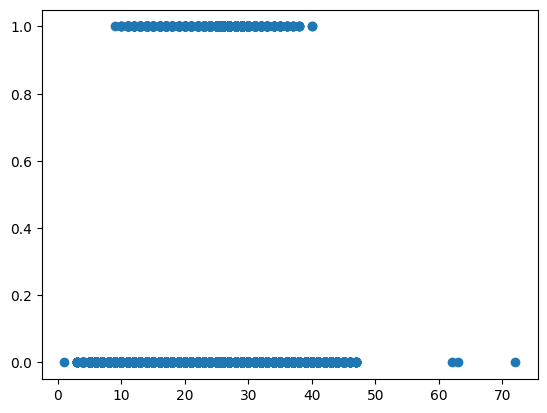

In [ ]:
plt.plot(X_train['_tempm'], X_train['_rain'], label='_rain', marker='o', linestyle='')
plt.show()

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9958139958139958
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10656
           1       0.97      0.89      0.93       333

    accuracy                           1.00     10989
   macro avg       0.98      0.95      0.96     10989
weighted avg       1.00      1.00      1.00     10989



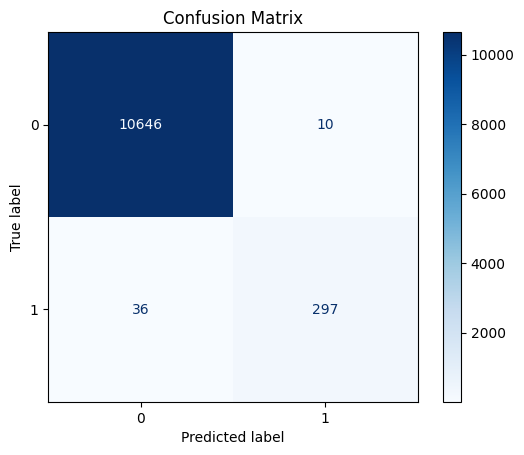

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()